## Practical Activity 4.2.7

### 1. Import the libraries

In [35]:
# import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2. Import file

In [37]:
# import the CSV and Excel file
ott = pd.read_excel("ott.xlsx")
movies = pd.read_csv("movies.csv")

print(ott.columns)
print(movies.columns)

Index(['ID', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'], dtype='object')
Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')


### 3. Validate the DataFrames

In [38]:
# data imported correctly?
print(movies.head())
print(movies.shape)
print(movies.dtypes)
print(ott.head())
print(ott.dtypes)
print(ott.shape)

   ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  18+   8.7             87%   
2   3          Avengers: Infinity War  2018  13+   8.5             84%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  18+   8.8             97%   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    

### 4. Combine the two DataFrames

In [39]:
# merge the two DataFrames
mov_ott = pd.merge(movies, ott, how = 'left', on = "ID")

# view the DataFrame
print(mov_ott.shape)
mov_ott.head()

(16744, 15)


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


### 5. Create a countplot

<AxesSubplot:xlabel='Age', ylabel='count'>

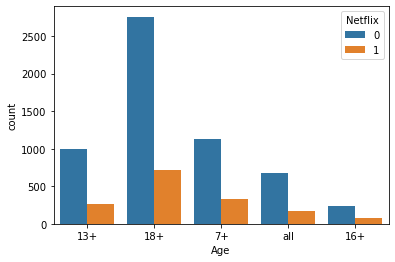

In [40]:
# create a countplot based on number of movies streamed by Netflix per age group
sns.countplot(x = "Age", hue = "Netflix", data = mov_ott)

### 6. Create a histogram

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

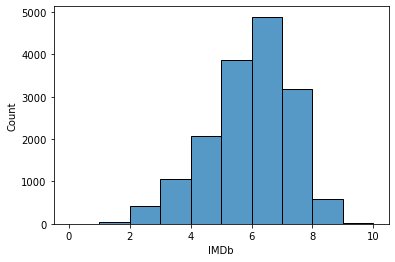

In [41]:
# create a histogram based IMDb 
sns.histplot(data = mov_ott, x = "IMDb", binwidth = 1)

### 7. Create a scatterplot

<AxesSubplot:xlabel='IMDb', ylabel='Rotten Tomatoes'>

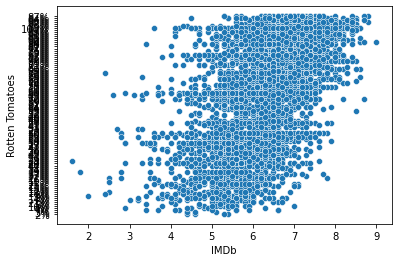

In [42]:
# create scatterplot with two variables (IMDb and Rotten Tomatoes)
sns.scatterplot(x = "IMDb", y = "Rotten Tomatoes", data = mov_ott)

### 8. Create a lineplot

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

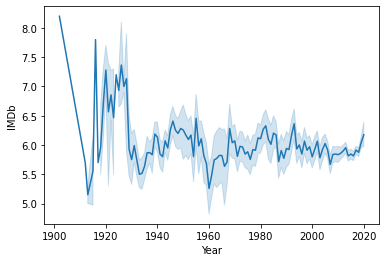

In [43]:
# create a simple lineplot
sns.lineplot(x = "Year", y = "IMDb", data = mov_ott)

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

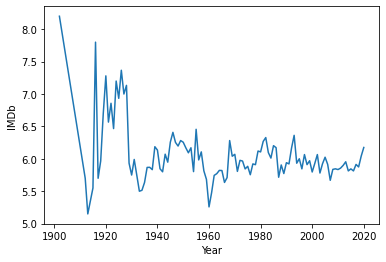

In [44]:
# create a simple lineplot
sns.lineplot(x = "Year", y = "IMDb", data = mov_ott, ci = None)

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

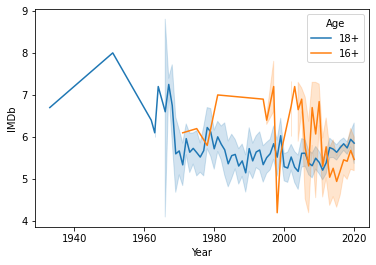

In [45]:
# create lineplots with specification
sns.lineplot(x = "Year", y = "IMDb",
             data = mov_ott[mov_ott["Age"].isin(["16+","18+"])],
             hue = "Age")

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

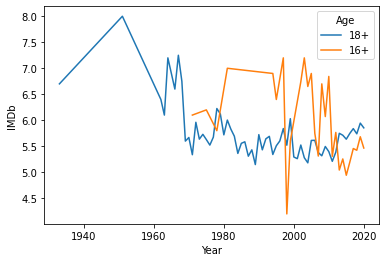

In [46]:
# create lineplots with specification
sns.lineplot(x = "Year", y = "IMDb",
             data = mov_ott[mov_ott["Age"].isin(["16+","18+"])],
             hue = "Age", ci = None)

### 9. Customise plots

#### Barplot

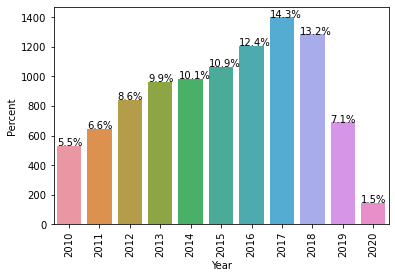

In [47]:
mov_ott_2010 = mov_ott[mov_ott['Year'] >= 2010]

ax = sns.countplot(x = "Year", data = mov_ott_2010)

ax.set(ylabel = "Percent")

total = len(mov_ott_2010["Year"])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

plt.xticks(rotation = 90)
plt.show()

#### Histogram

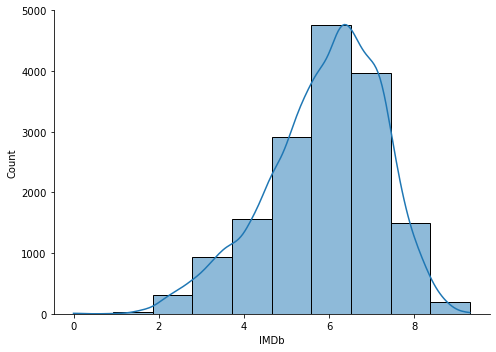

In [48]:
ax = sns.displot(data = mov_ott, x = "IMDb", bins = 10,kind = 'hist', 
                 palette = 'GnBu', aspect = 1.4, kde = True)

plt.show()

### 10. Highlight and annotate plots

#### Scatterplot

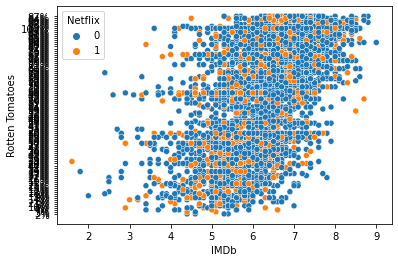

In [49]:
sns.scatterplot(data = mov_ott, x = 'IMDb', y = 'Rotten Tomatoes', hue = 'Netflix')

plt.show()

#### Boxplot

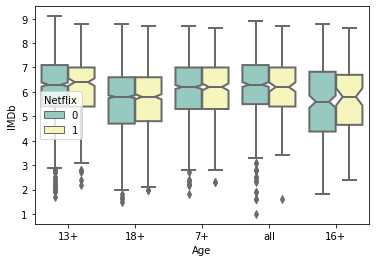

In [53]:
sns.boxplot(data = mov_ott, x = 'Age', y = 'IMDb', linewidth = 2,
            notch = True, hue = 'Netflix', palette = 'Set3')

plt.show()

#### Lineplot

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

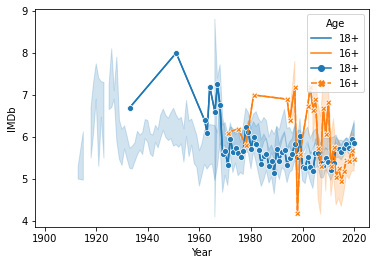

In [54]:
sns.lineplot(x = 'Year', y = 'IMDb', data = mov_ott, linewidth = 0)

sns.lineplot(x = 'Year', y = 'IMDb',
            data = mov_ott[mov_ott['Age'].isin(['16+', '18+'])],
            hue = 'Age')

sns.lineplot(x = 'Year', y = 'IMDb',
            data = mov_ott[mov_ott['Age'].isin(['16+', '18+'])],
            hue = 'Age', style = 'Age', markers = True, ci = 0)